# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [94]:
from Tools.tools import rec
from Tools.tools import collection
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sns = sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

### Collection 

In [88]:
# collection()

#### 1. Importer votre DataSet

In [89]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])
mydata.shape

(230, 13)

##### Print

In [90]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,13.925822,-9.692369,3.753776,1.327168,2.975534,-7.993735,-0.575305,-7.071838,-8.511768,-1.650743,-2.721607,-5.412130,0.0
1,14.055519,-8.598112,-0.383220,-7.007748,-1.833112,-7.642512,4.104115,-0.713202,-4.826460,-2.594968,-5.888919,-5.624817,1.0
2,13.864094,-8.834997,1.500129,-7.639205,2.511519,-0.771141,4.451372,-5.286776,-12.323968,-8.869542,-5.942759,-6.046688,2.0
3,14.147140,-8.770026,2.766291,-7.528646,-3.671171,-10.579631,1.028021,-1.223803,-4.780219,-0.336830,0.487315,-3.639368,3.0
4,12.662124,-21.488978,-4.017699,-10.286525,-3.537687,-6.191114,2.452089,-0.002252,-2.034508,-1.515711,0.145741,0.618533,4.0


#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [92]:
#mydata.describe()
#mydata.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
mydata.isna().any()

Fe1       False
Fe2       False
Fe3       False
Fe4       False
Fe5       False
Fe6       False
Fe7       False
Fe8       False
Fe9       False
Fe10      False
Fe11      False
Fe12      False
Target    False
dtype: bool

#### 3. Visualiser les targets

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
225    5.0
226    6.0
227    7.0
228    8.0
229    9.0
Name: Target, Length: 230, dtype: float64


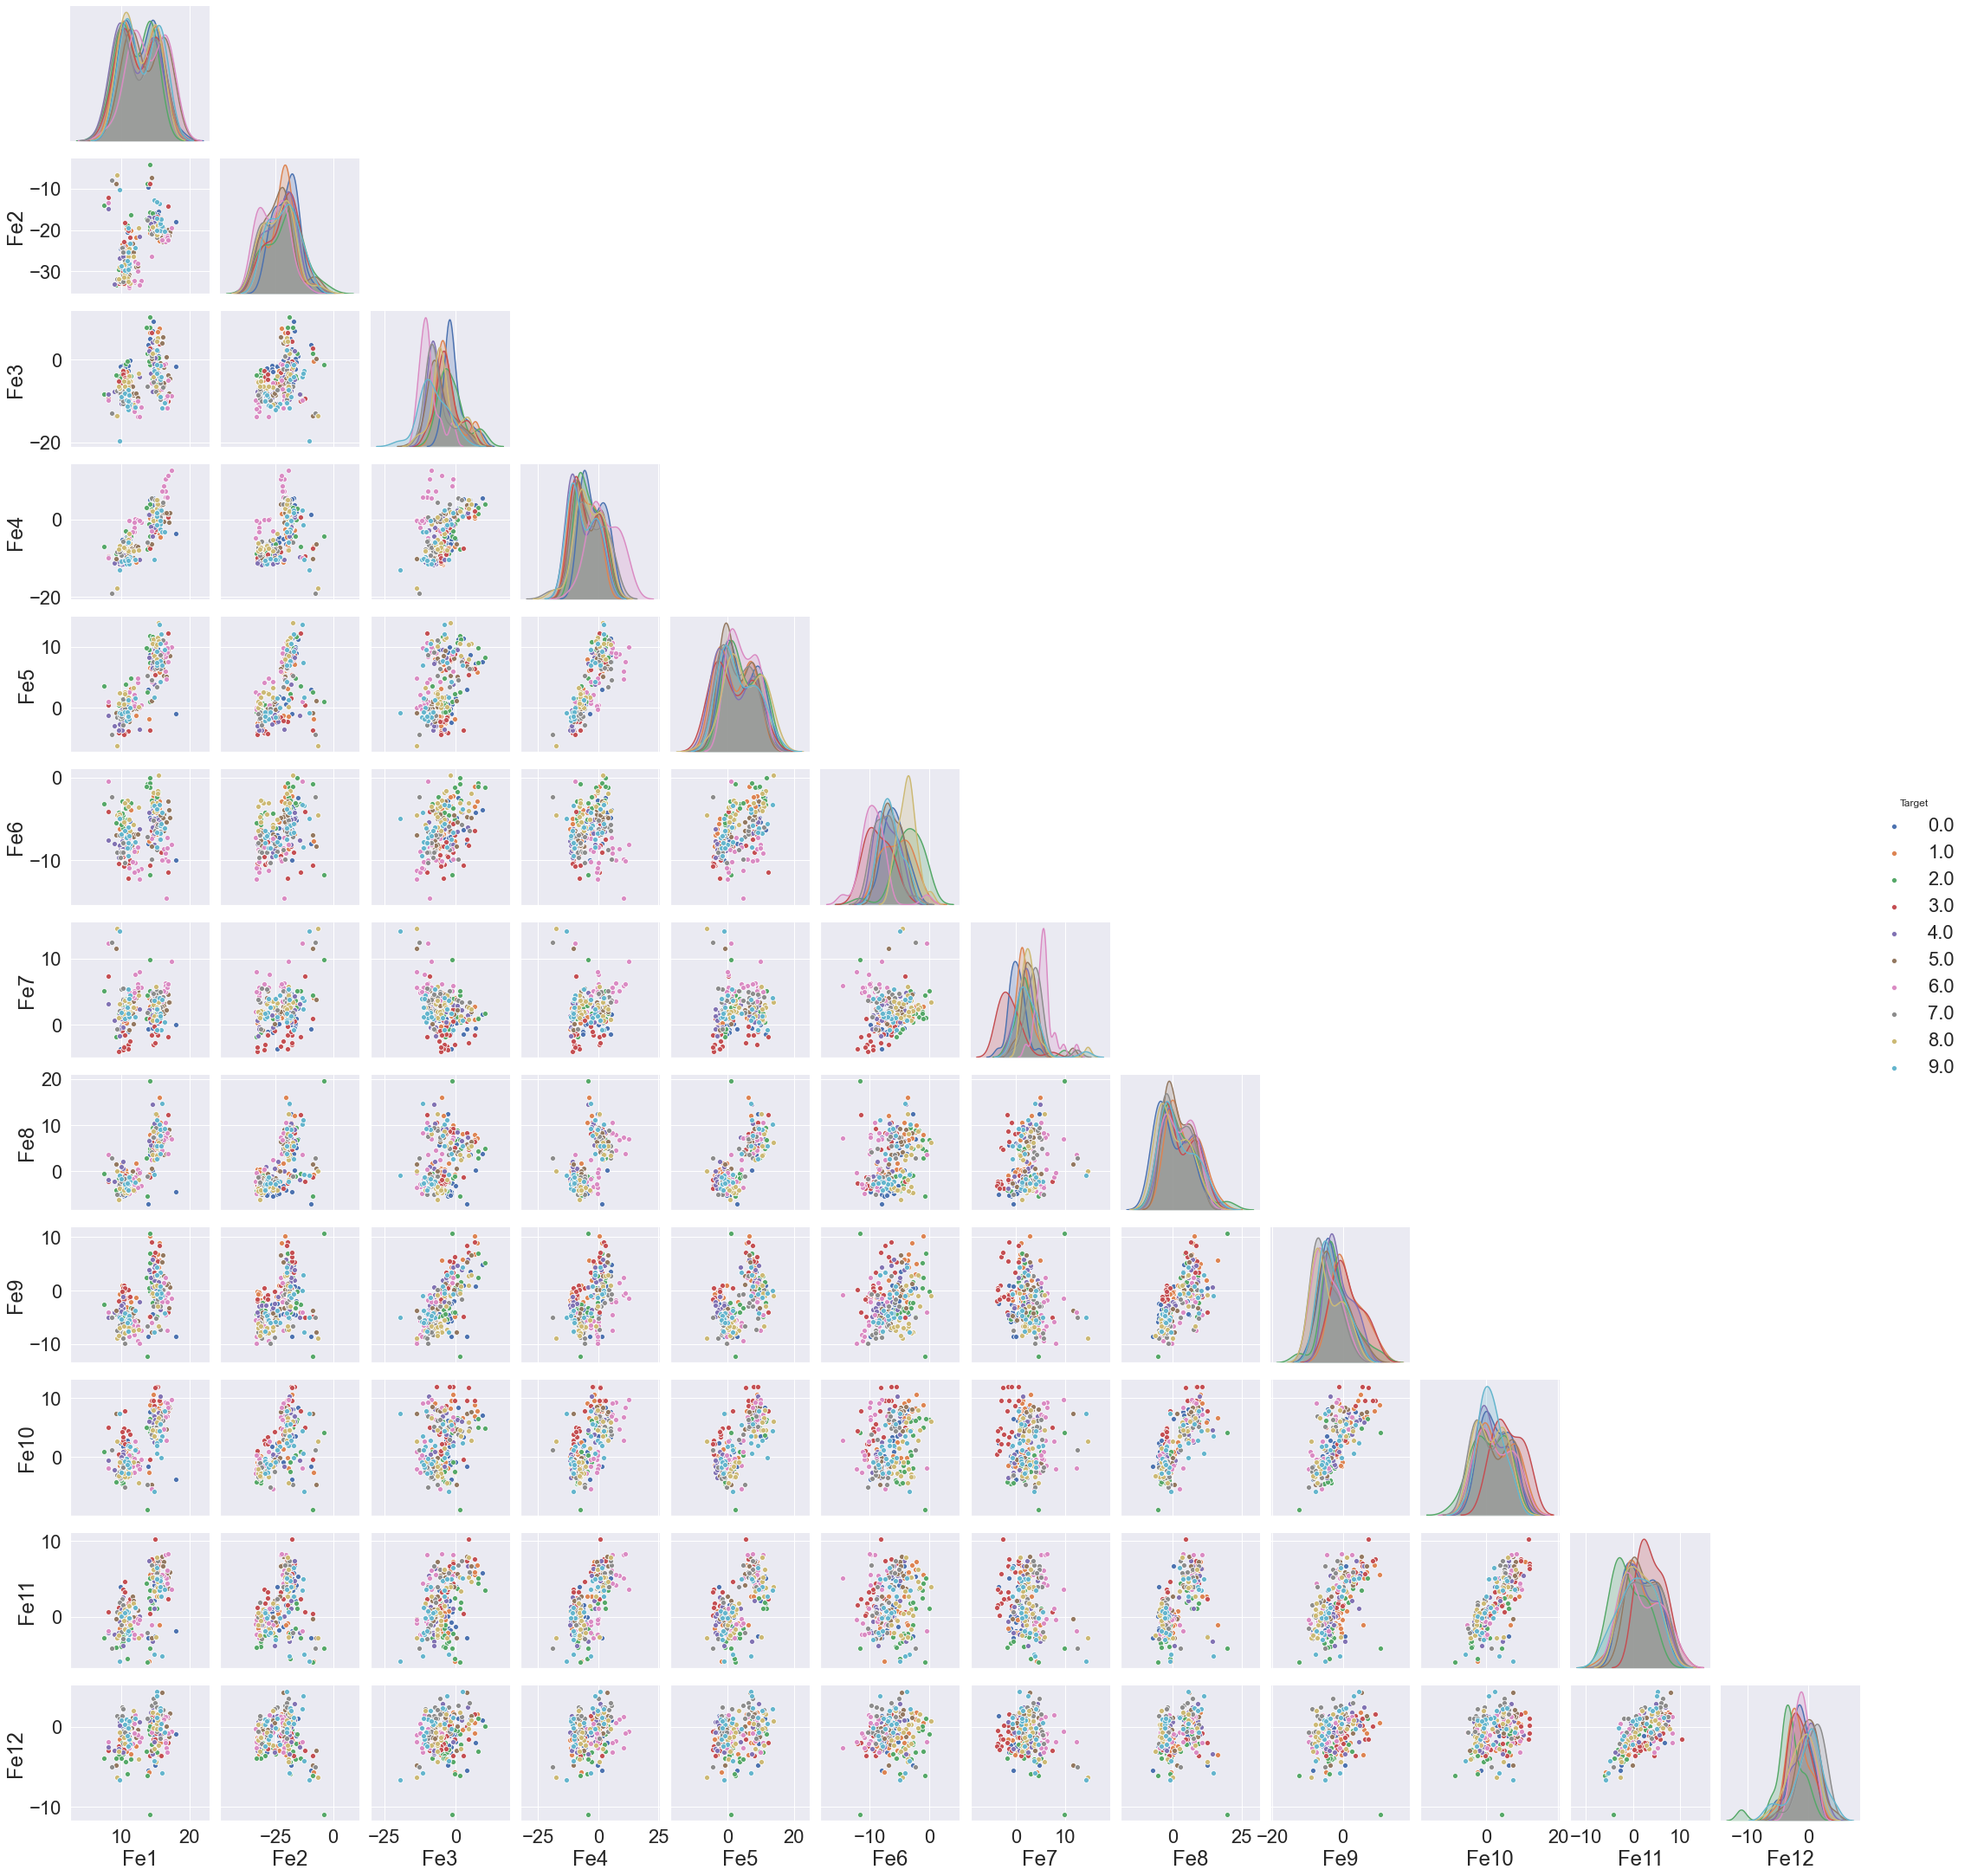

In [95]:
print(mydata['Target'])

sns.pairplot(mydata, hue='Target', corner=True)

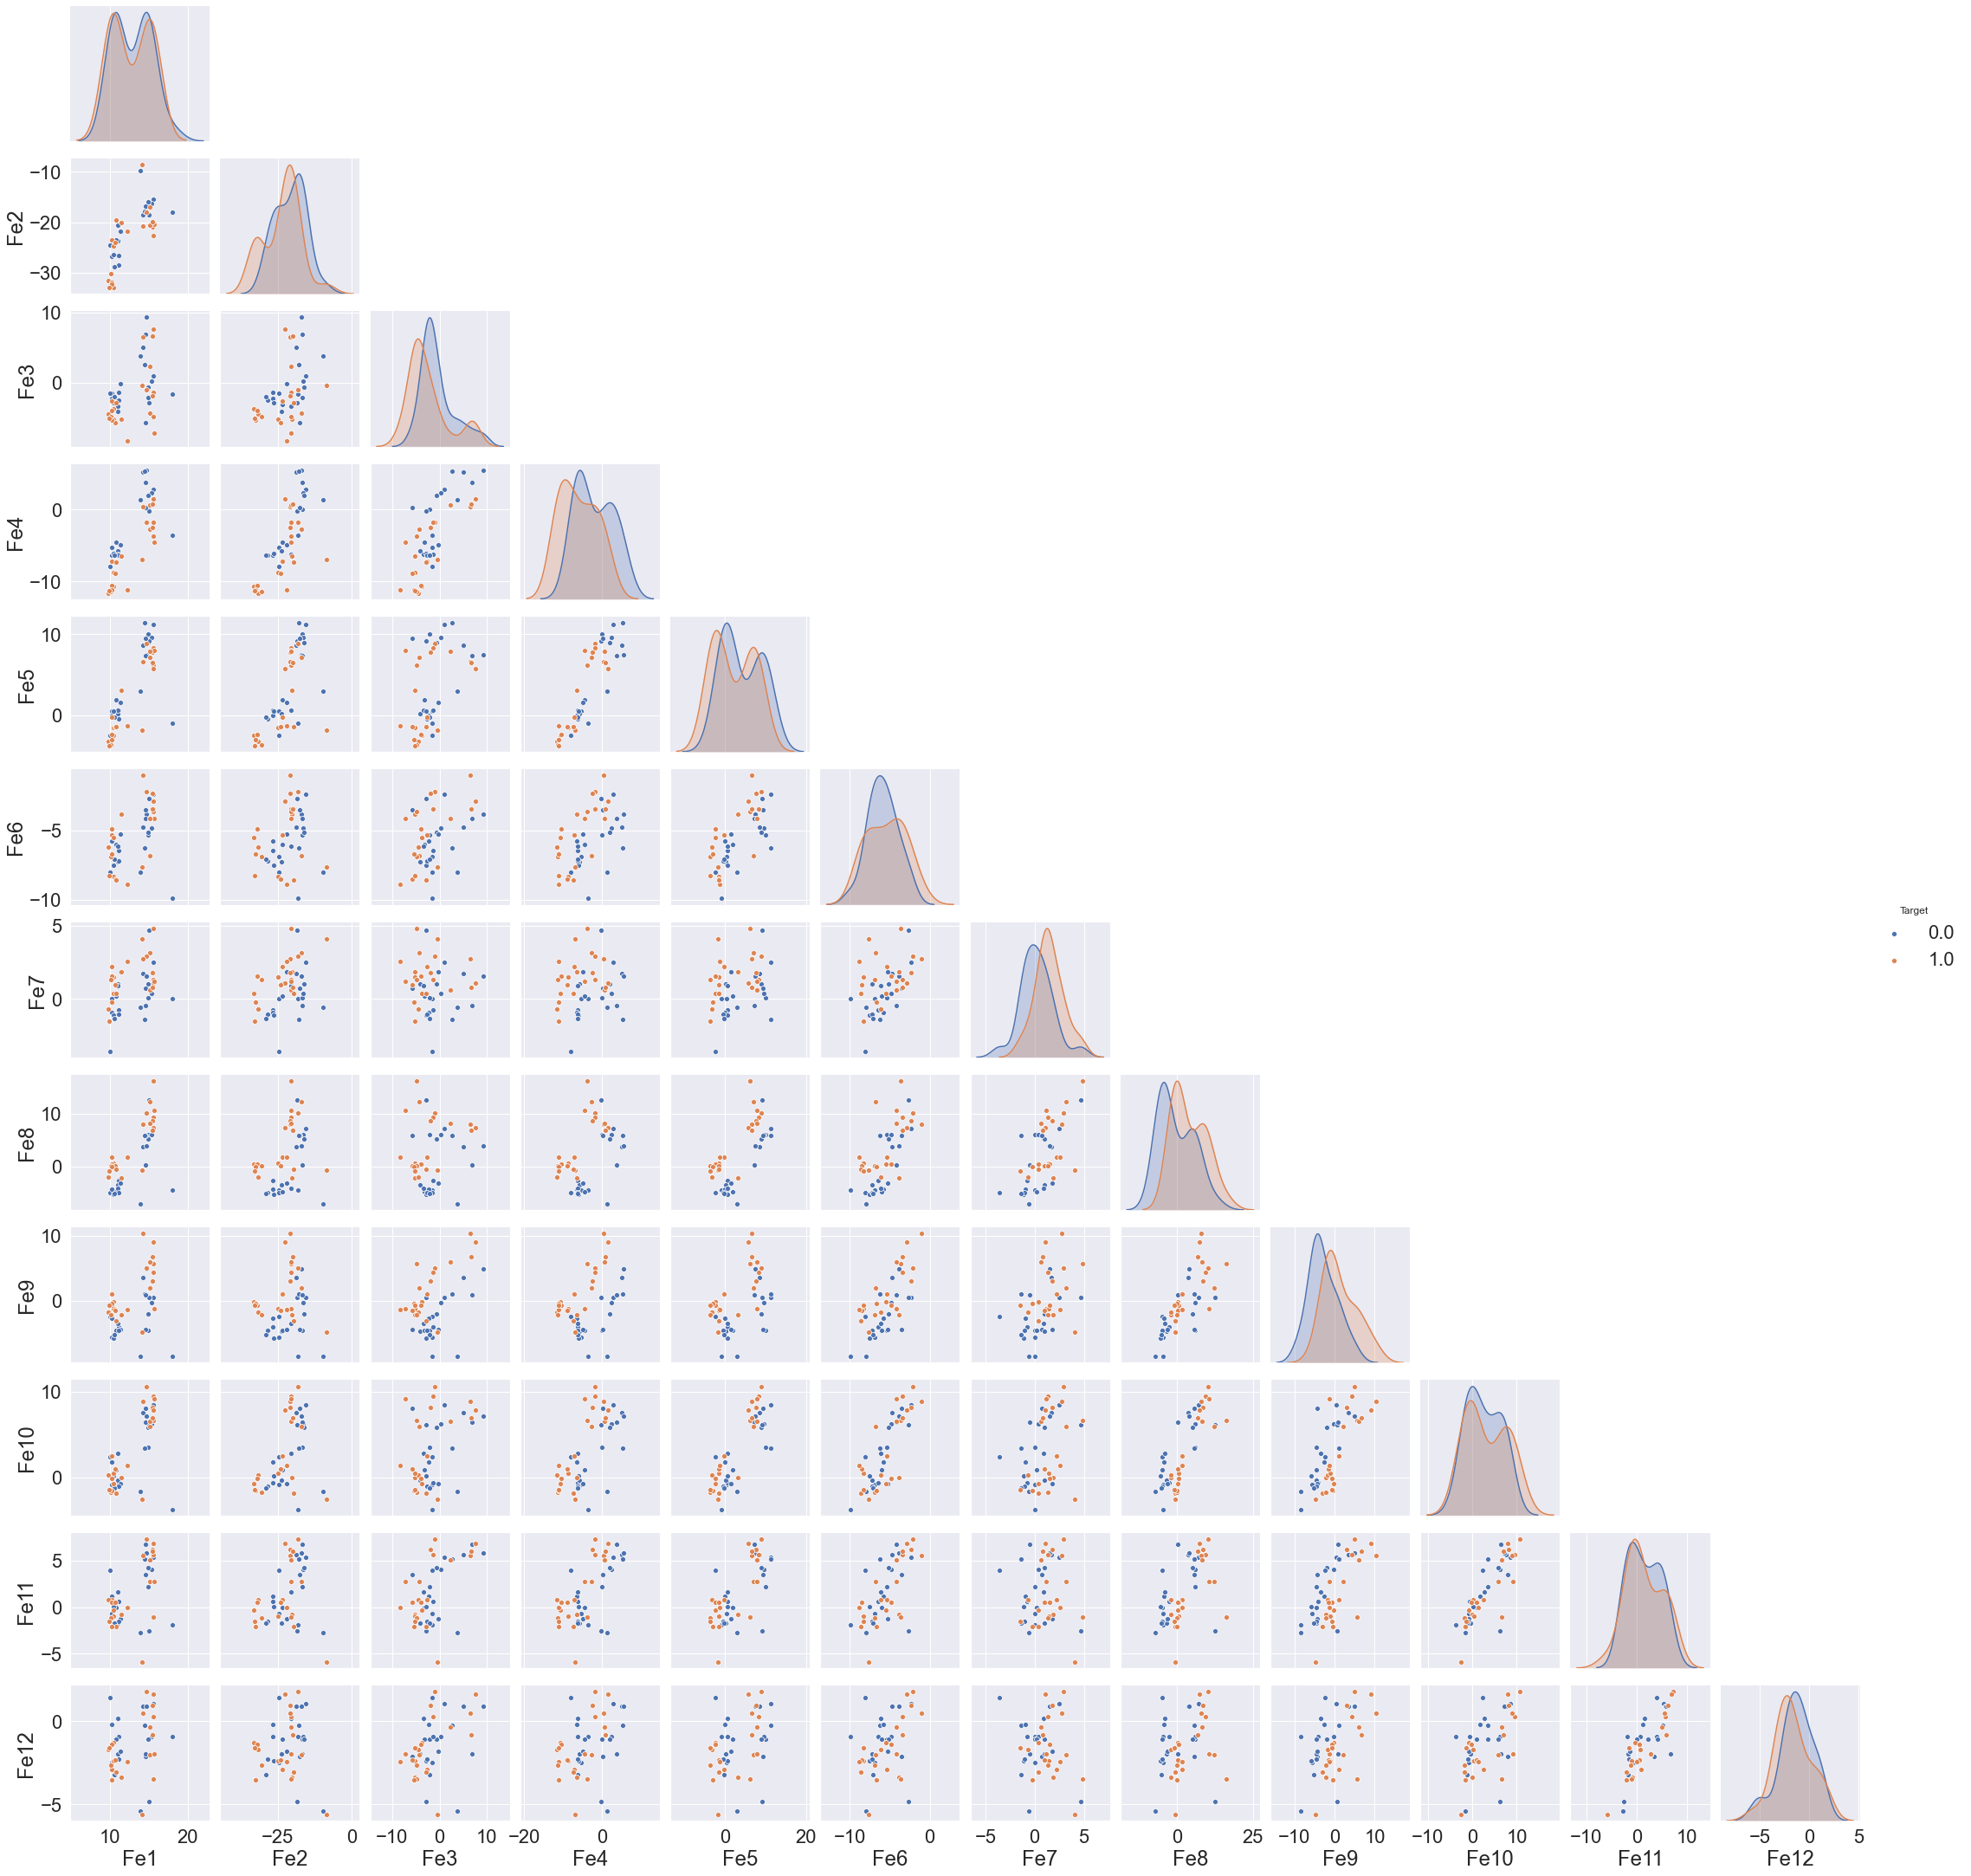

In [96]:
# Selection des 2 features les plus représentatives

data = mydata[mydata['Target'].isin([0, 1])]
sns.pairplot(data, hue='Target', corner=True)

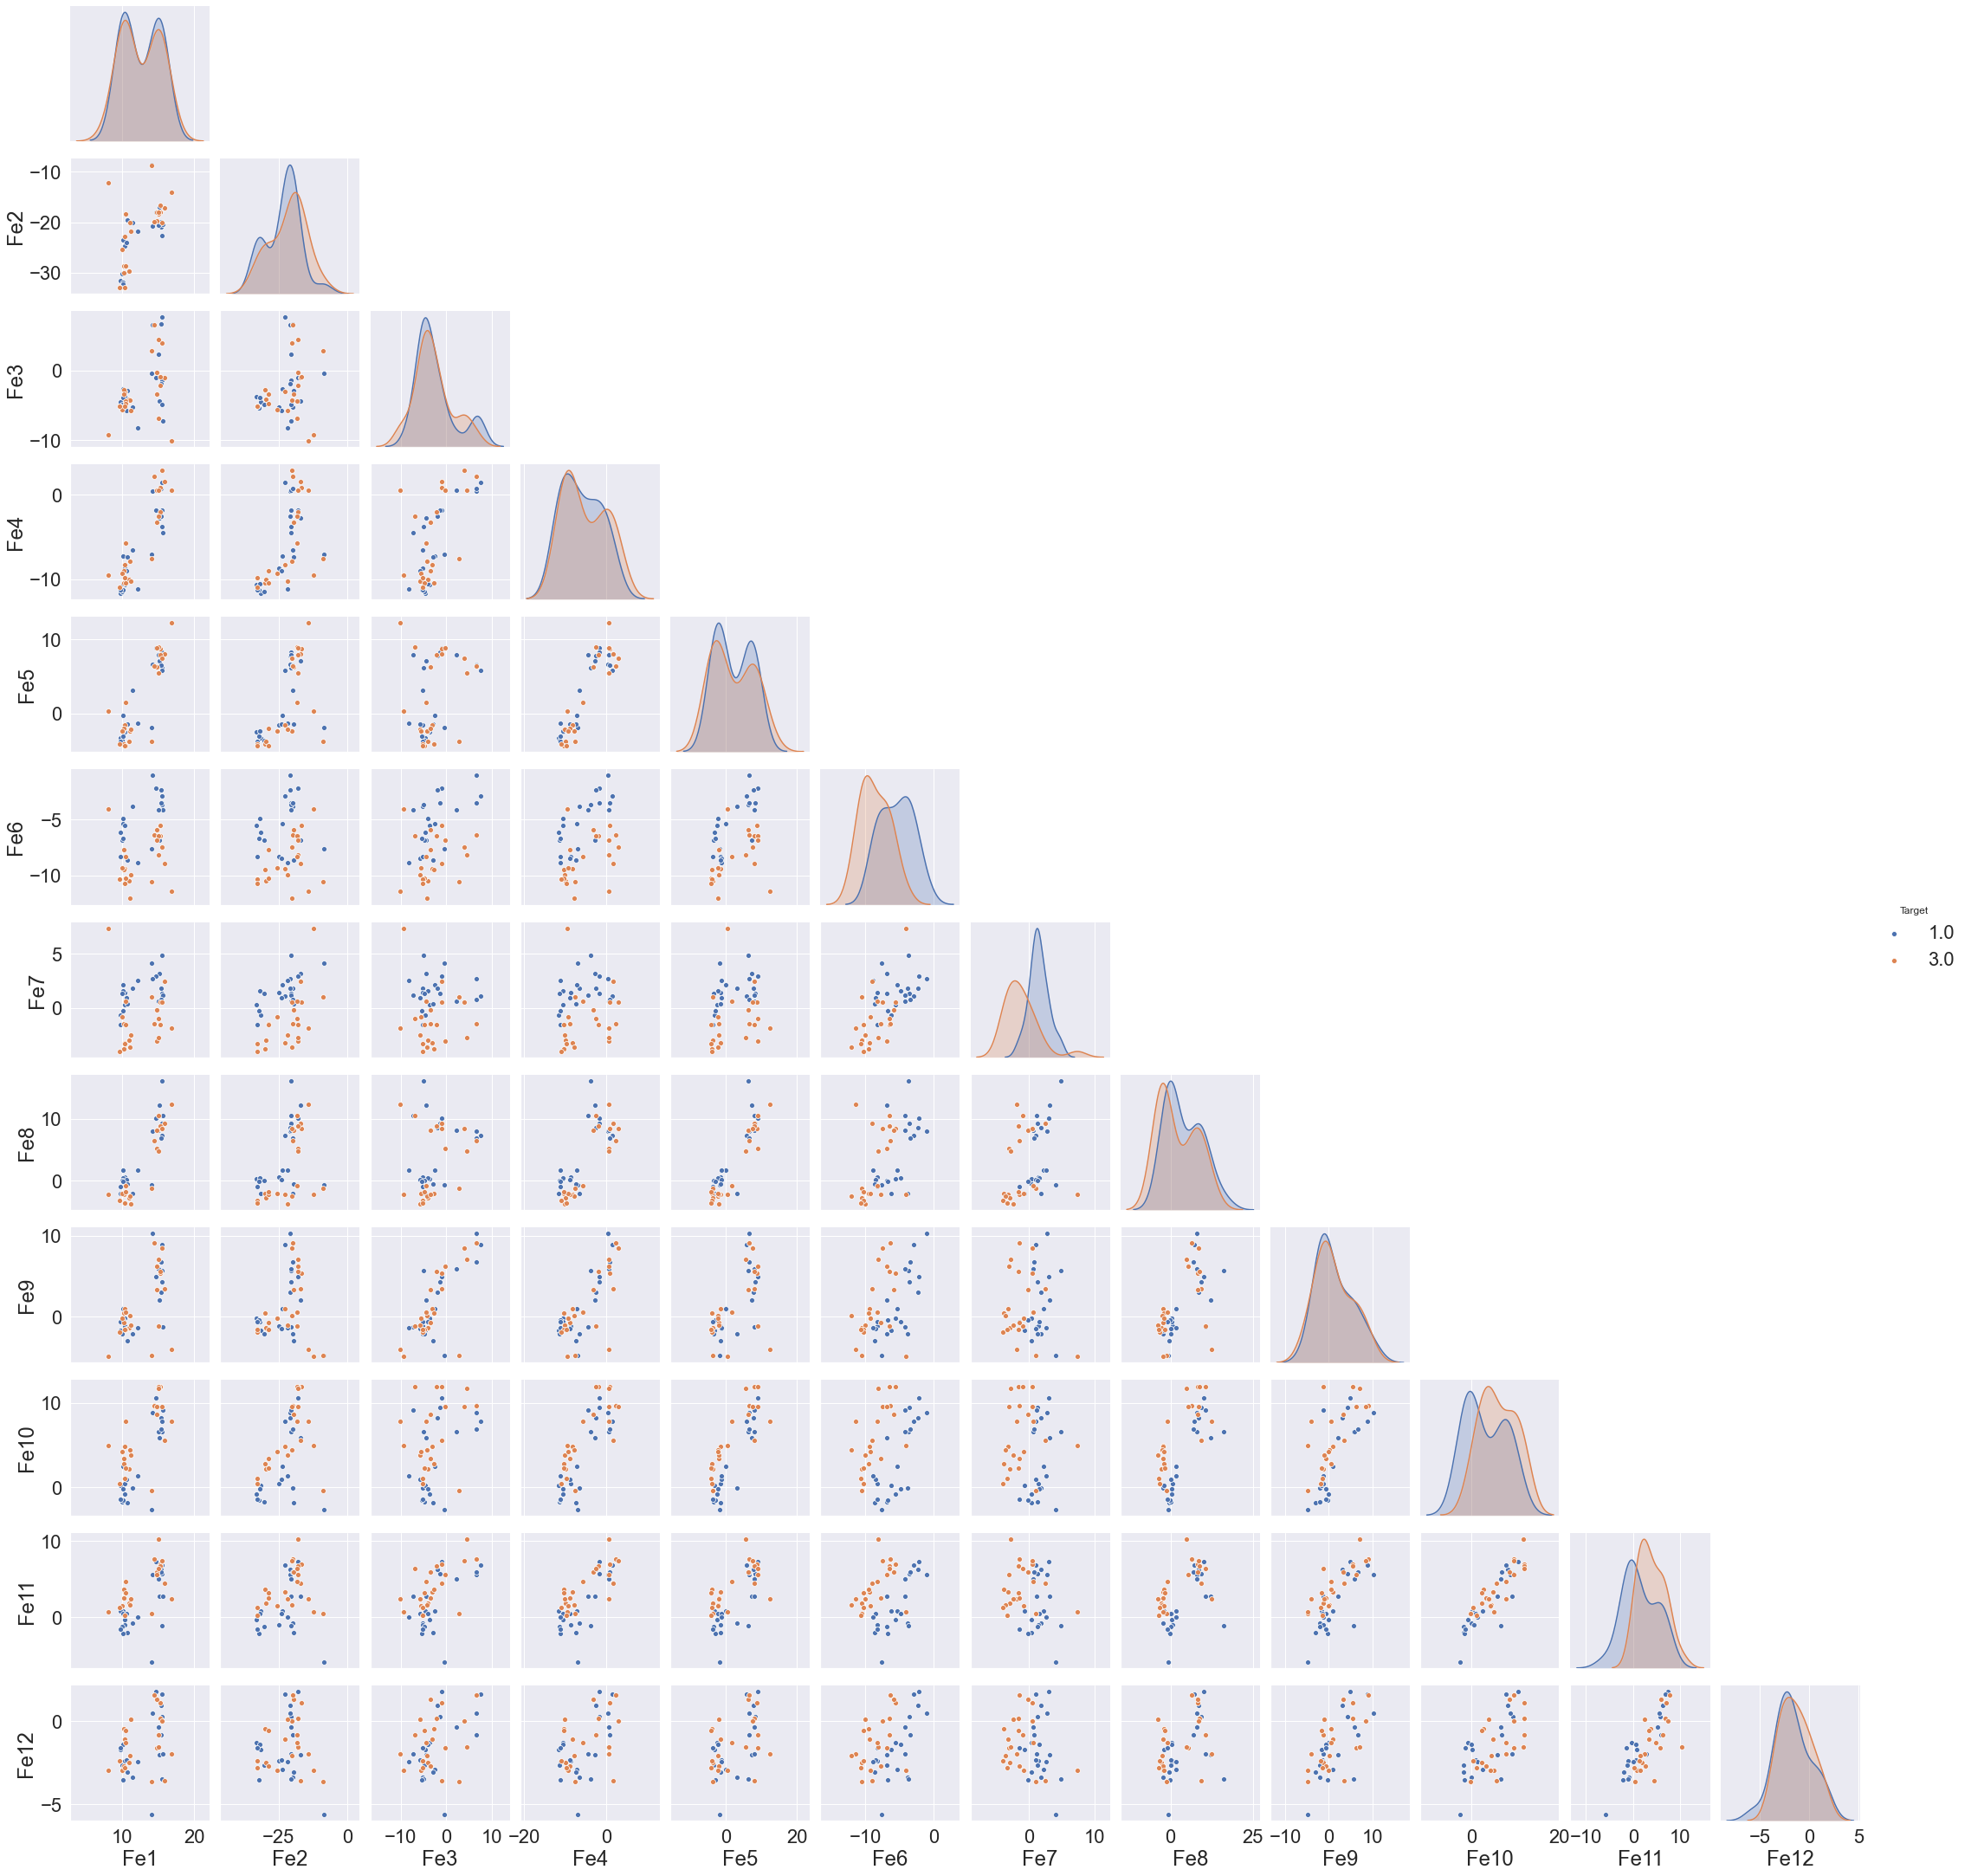

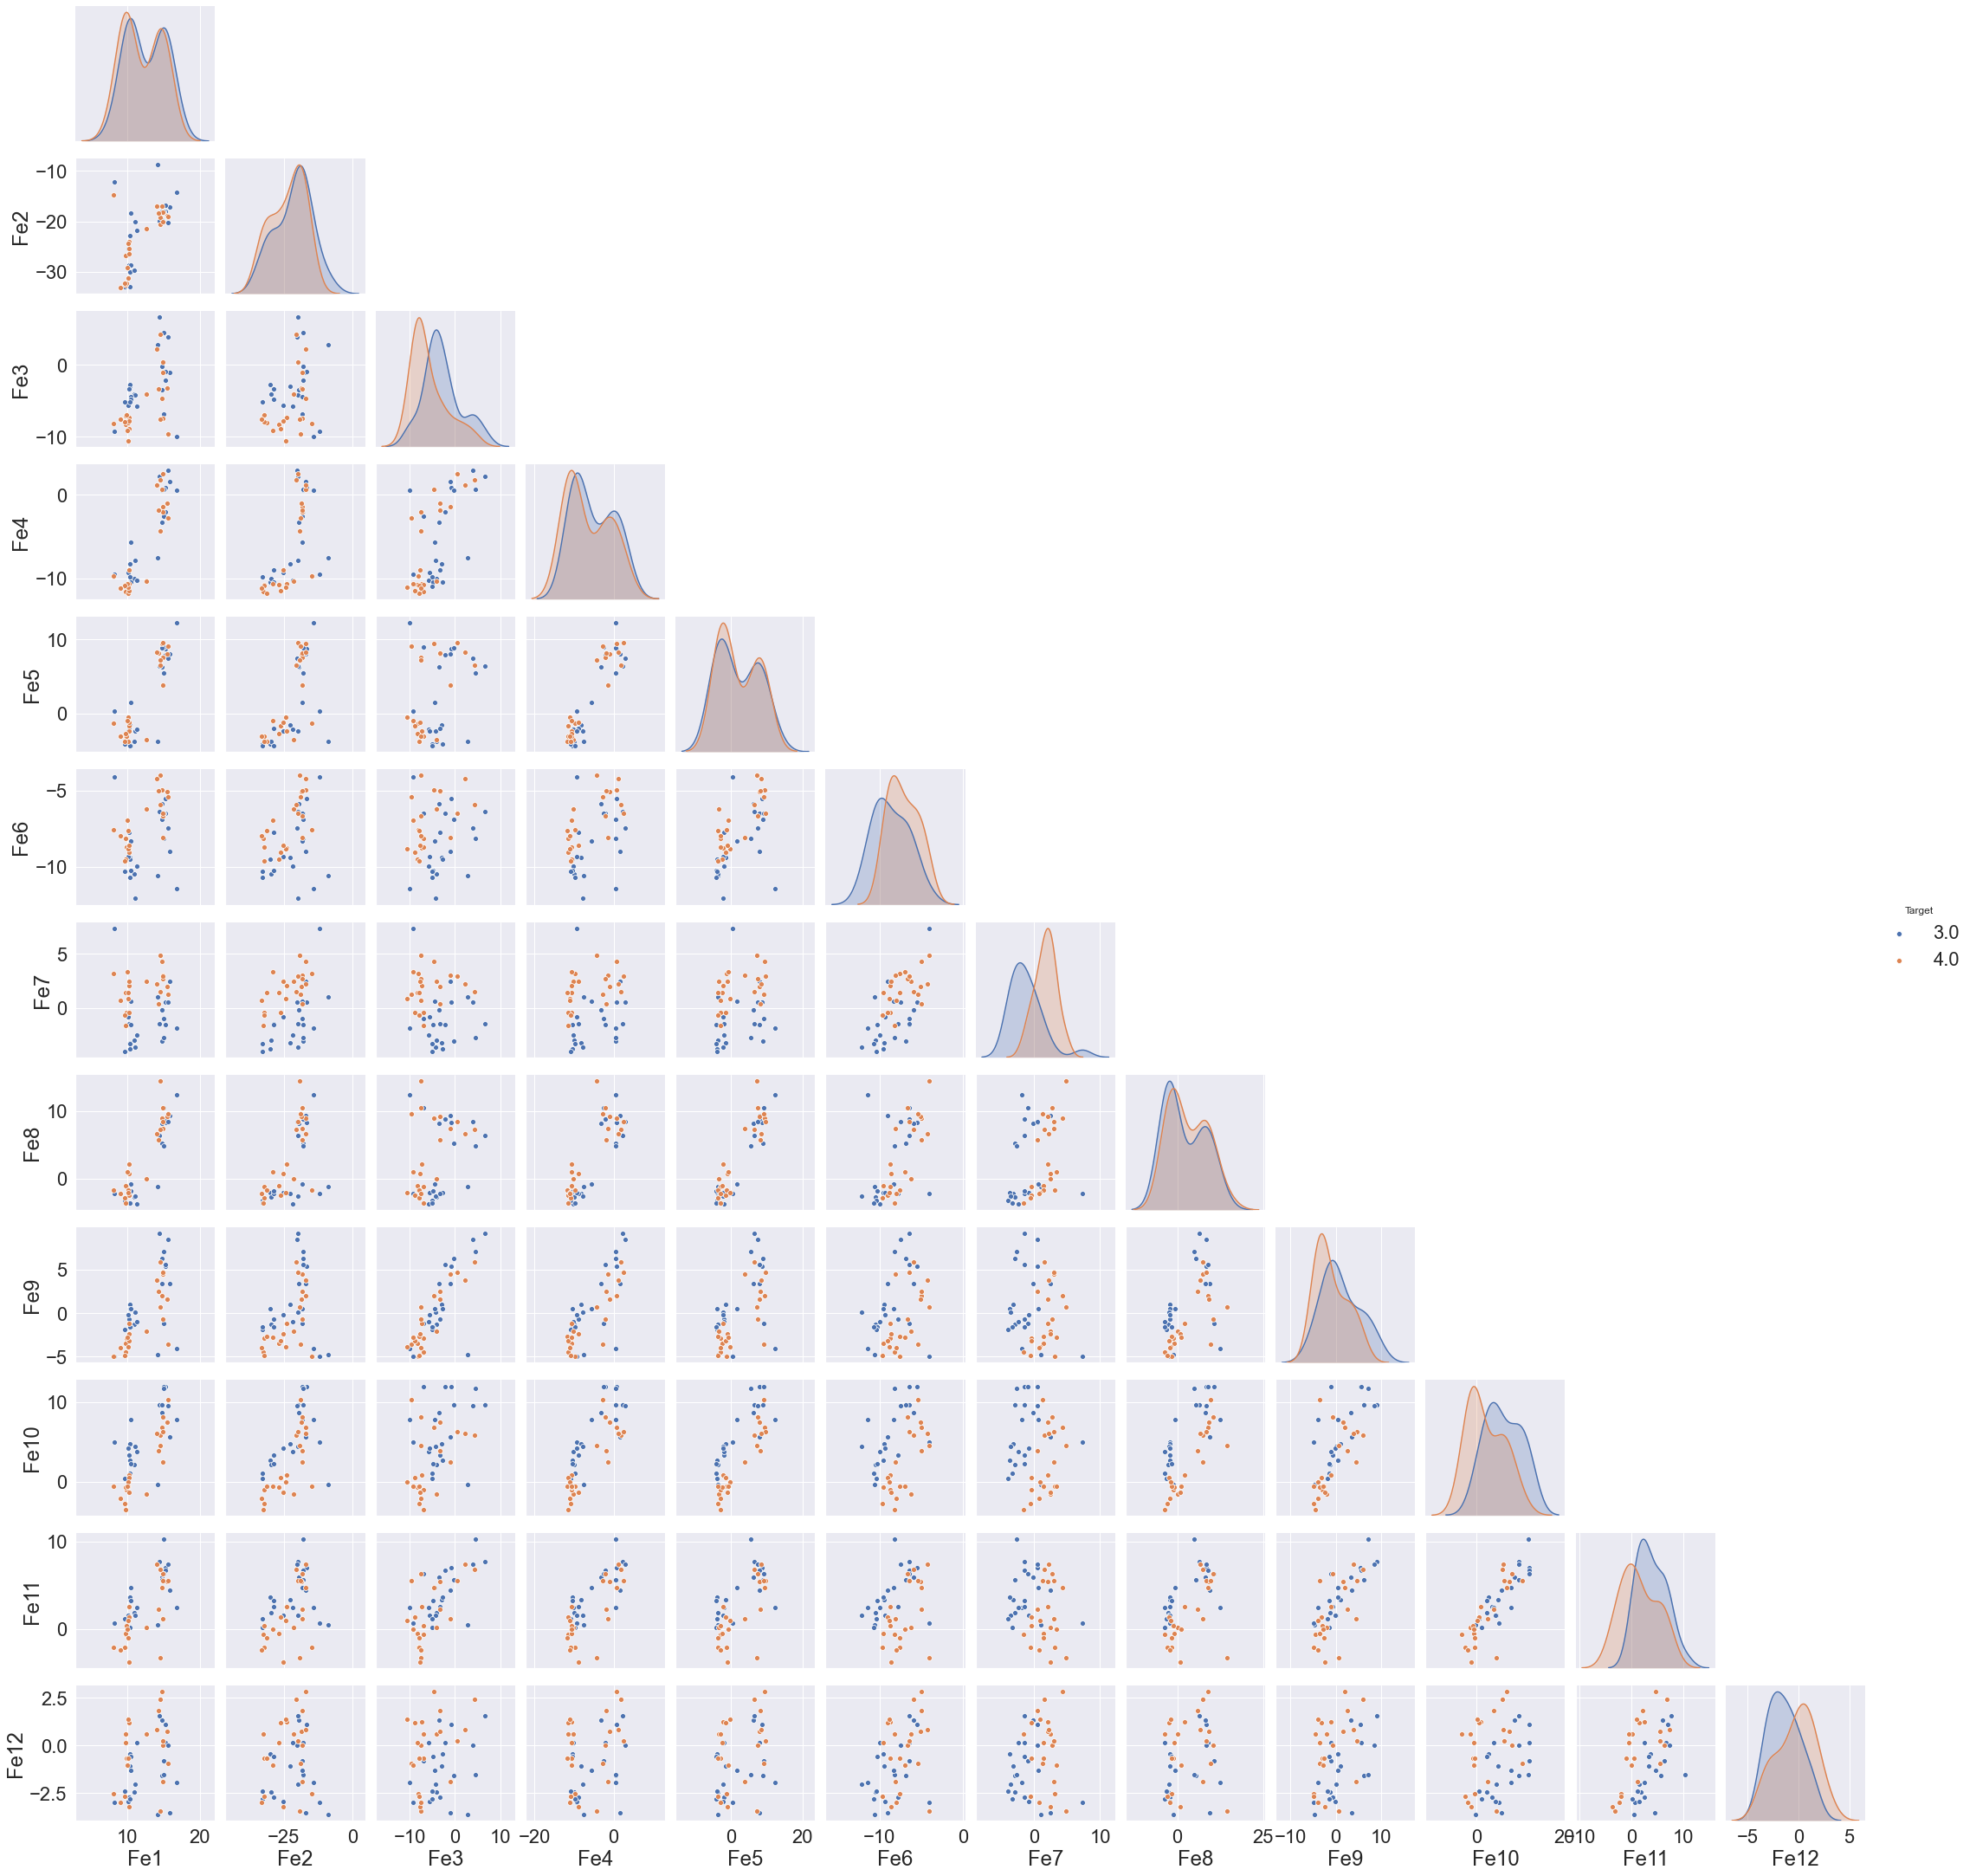

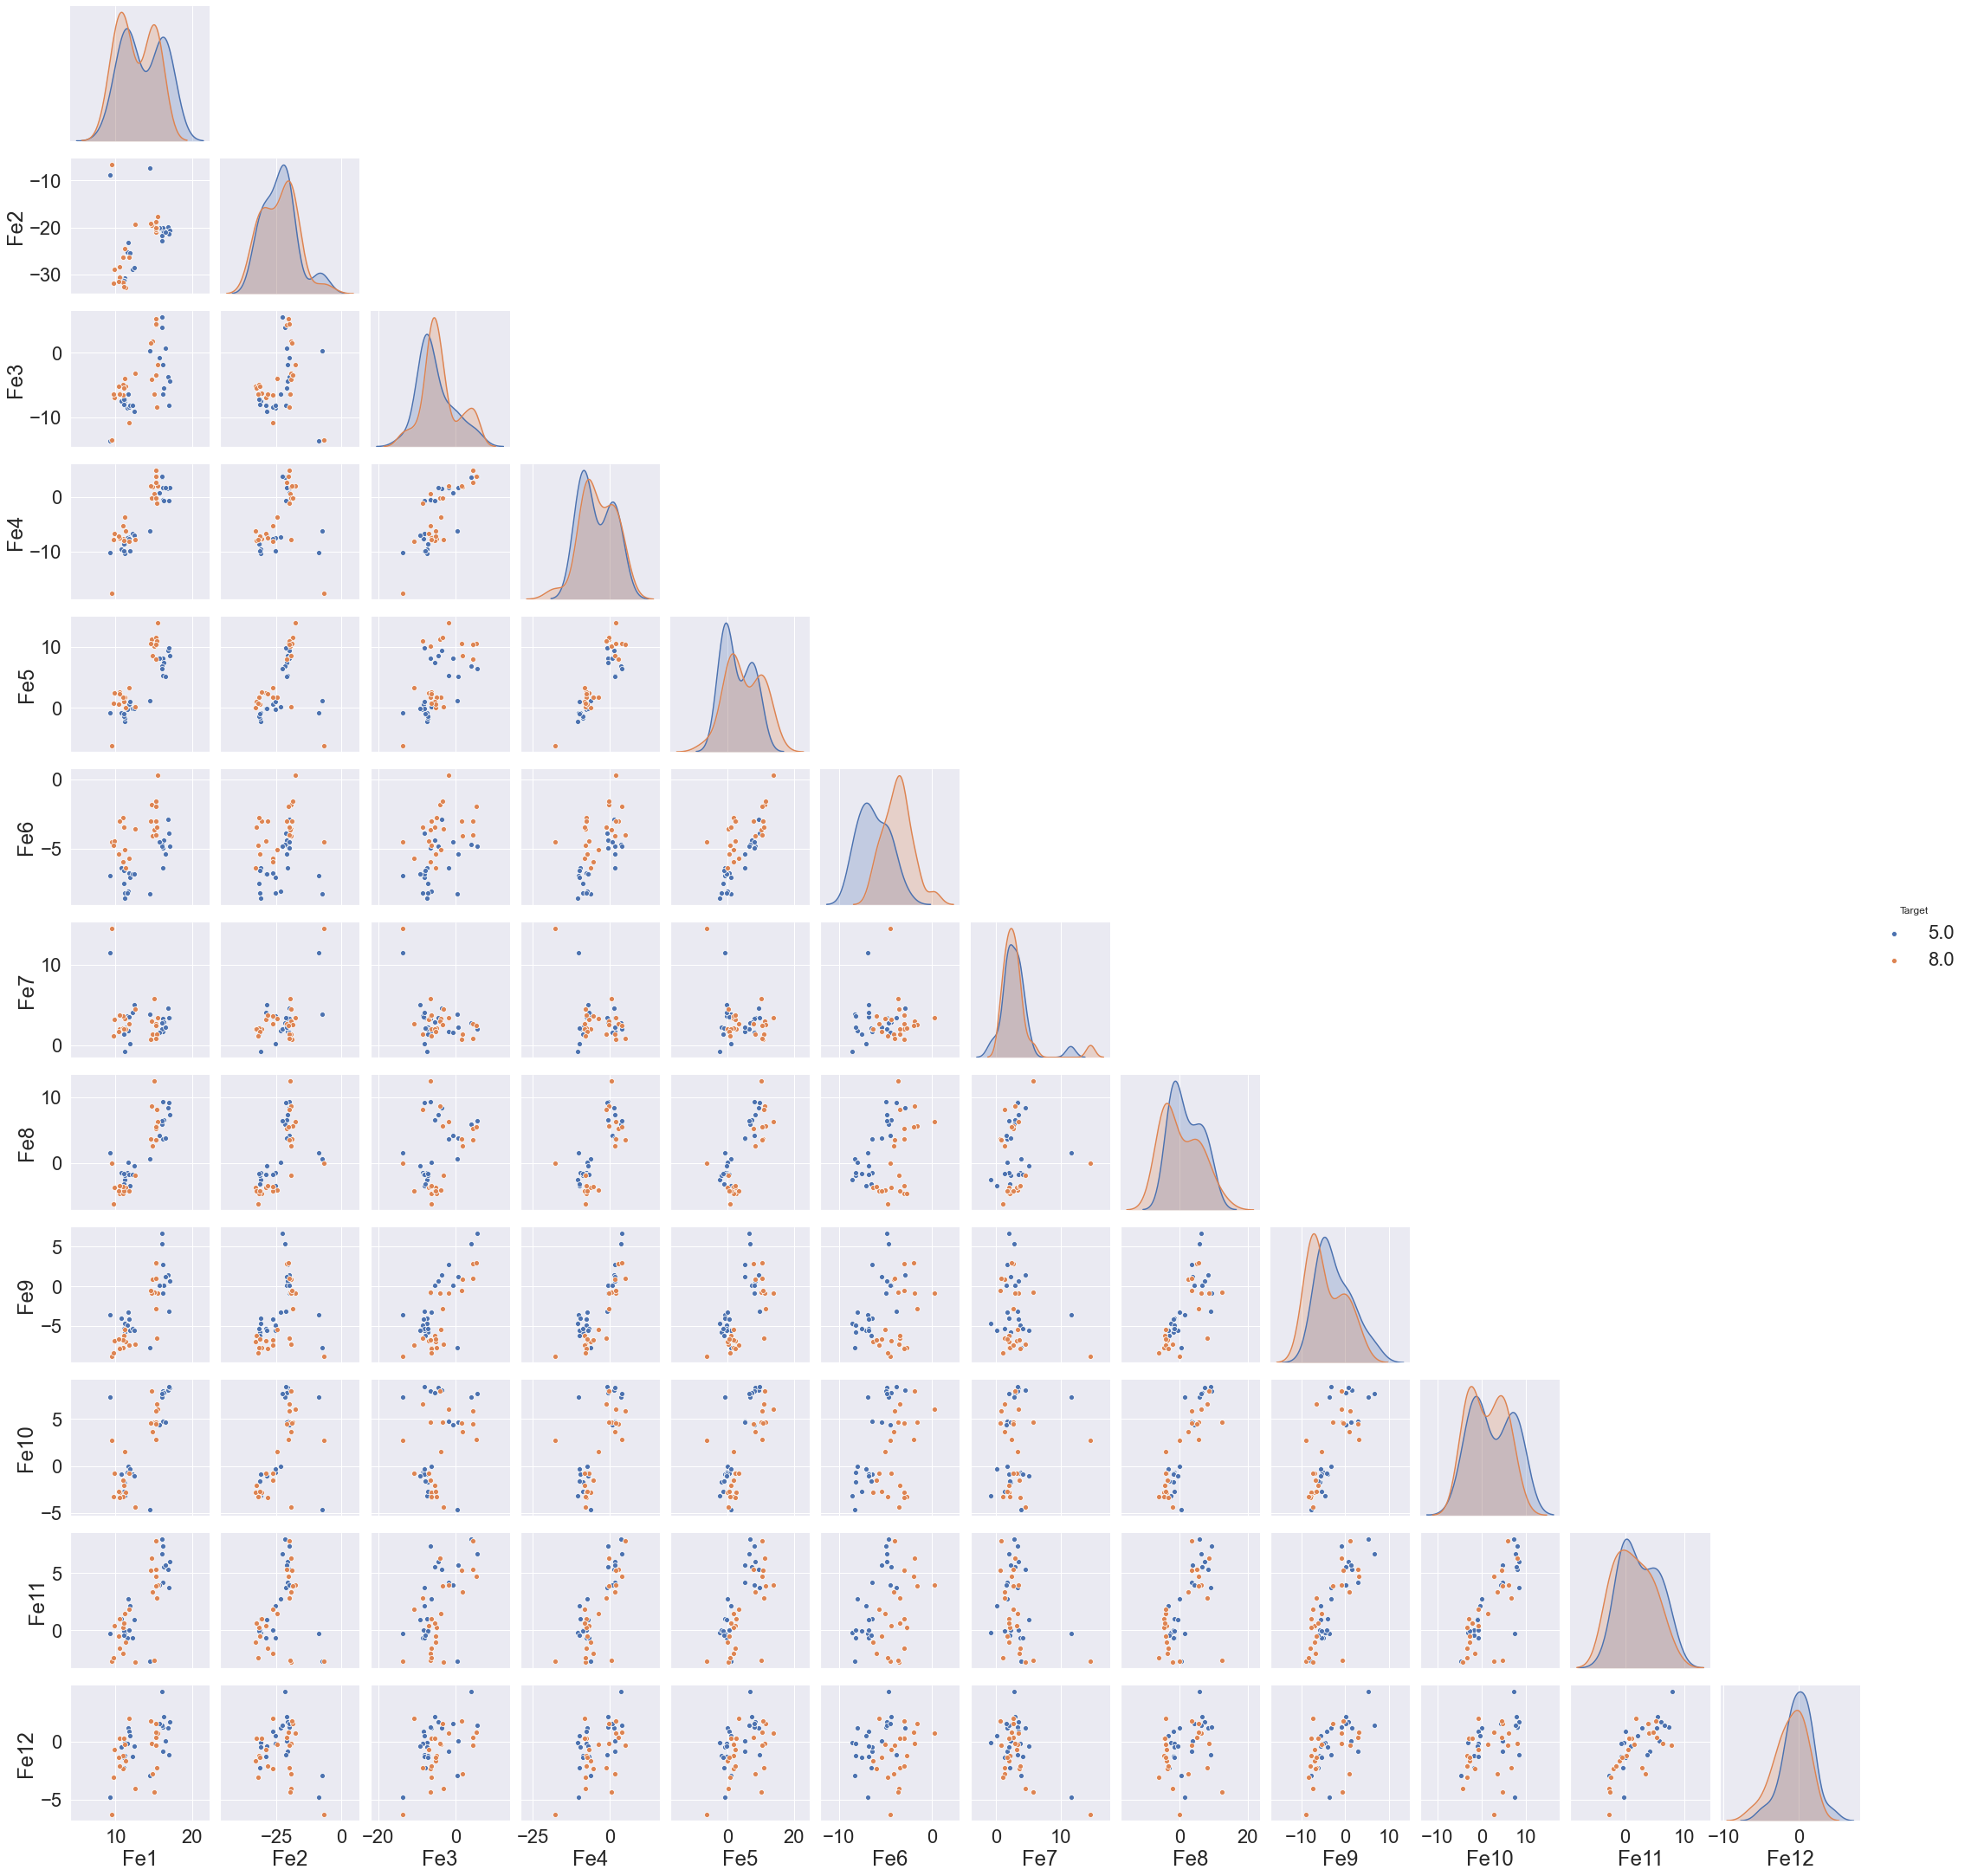

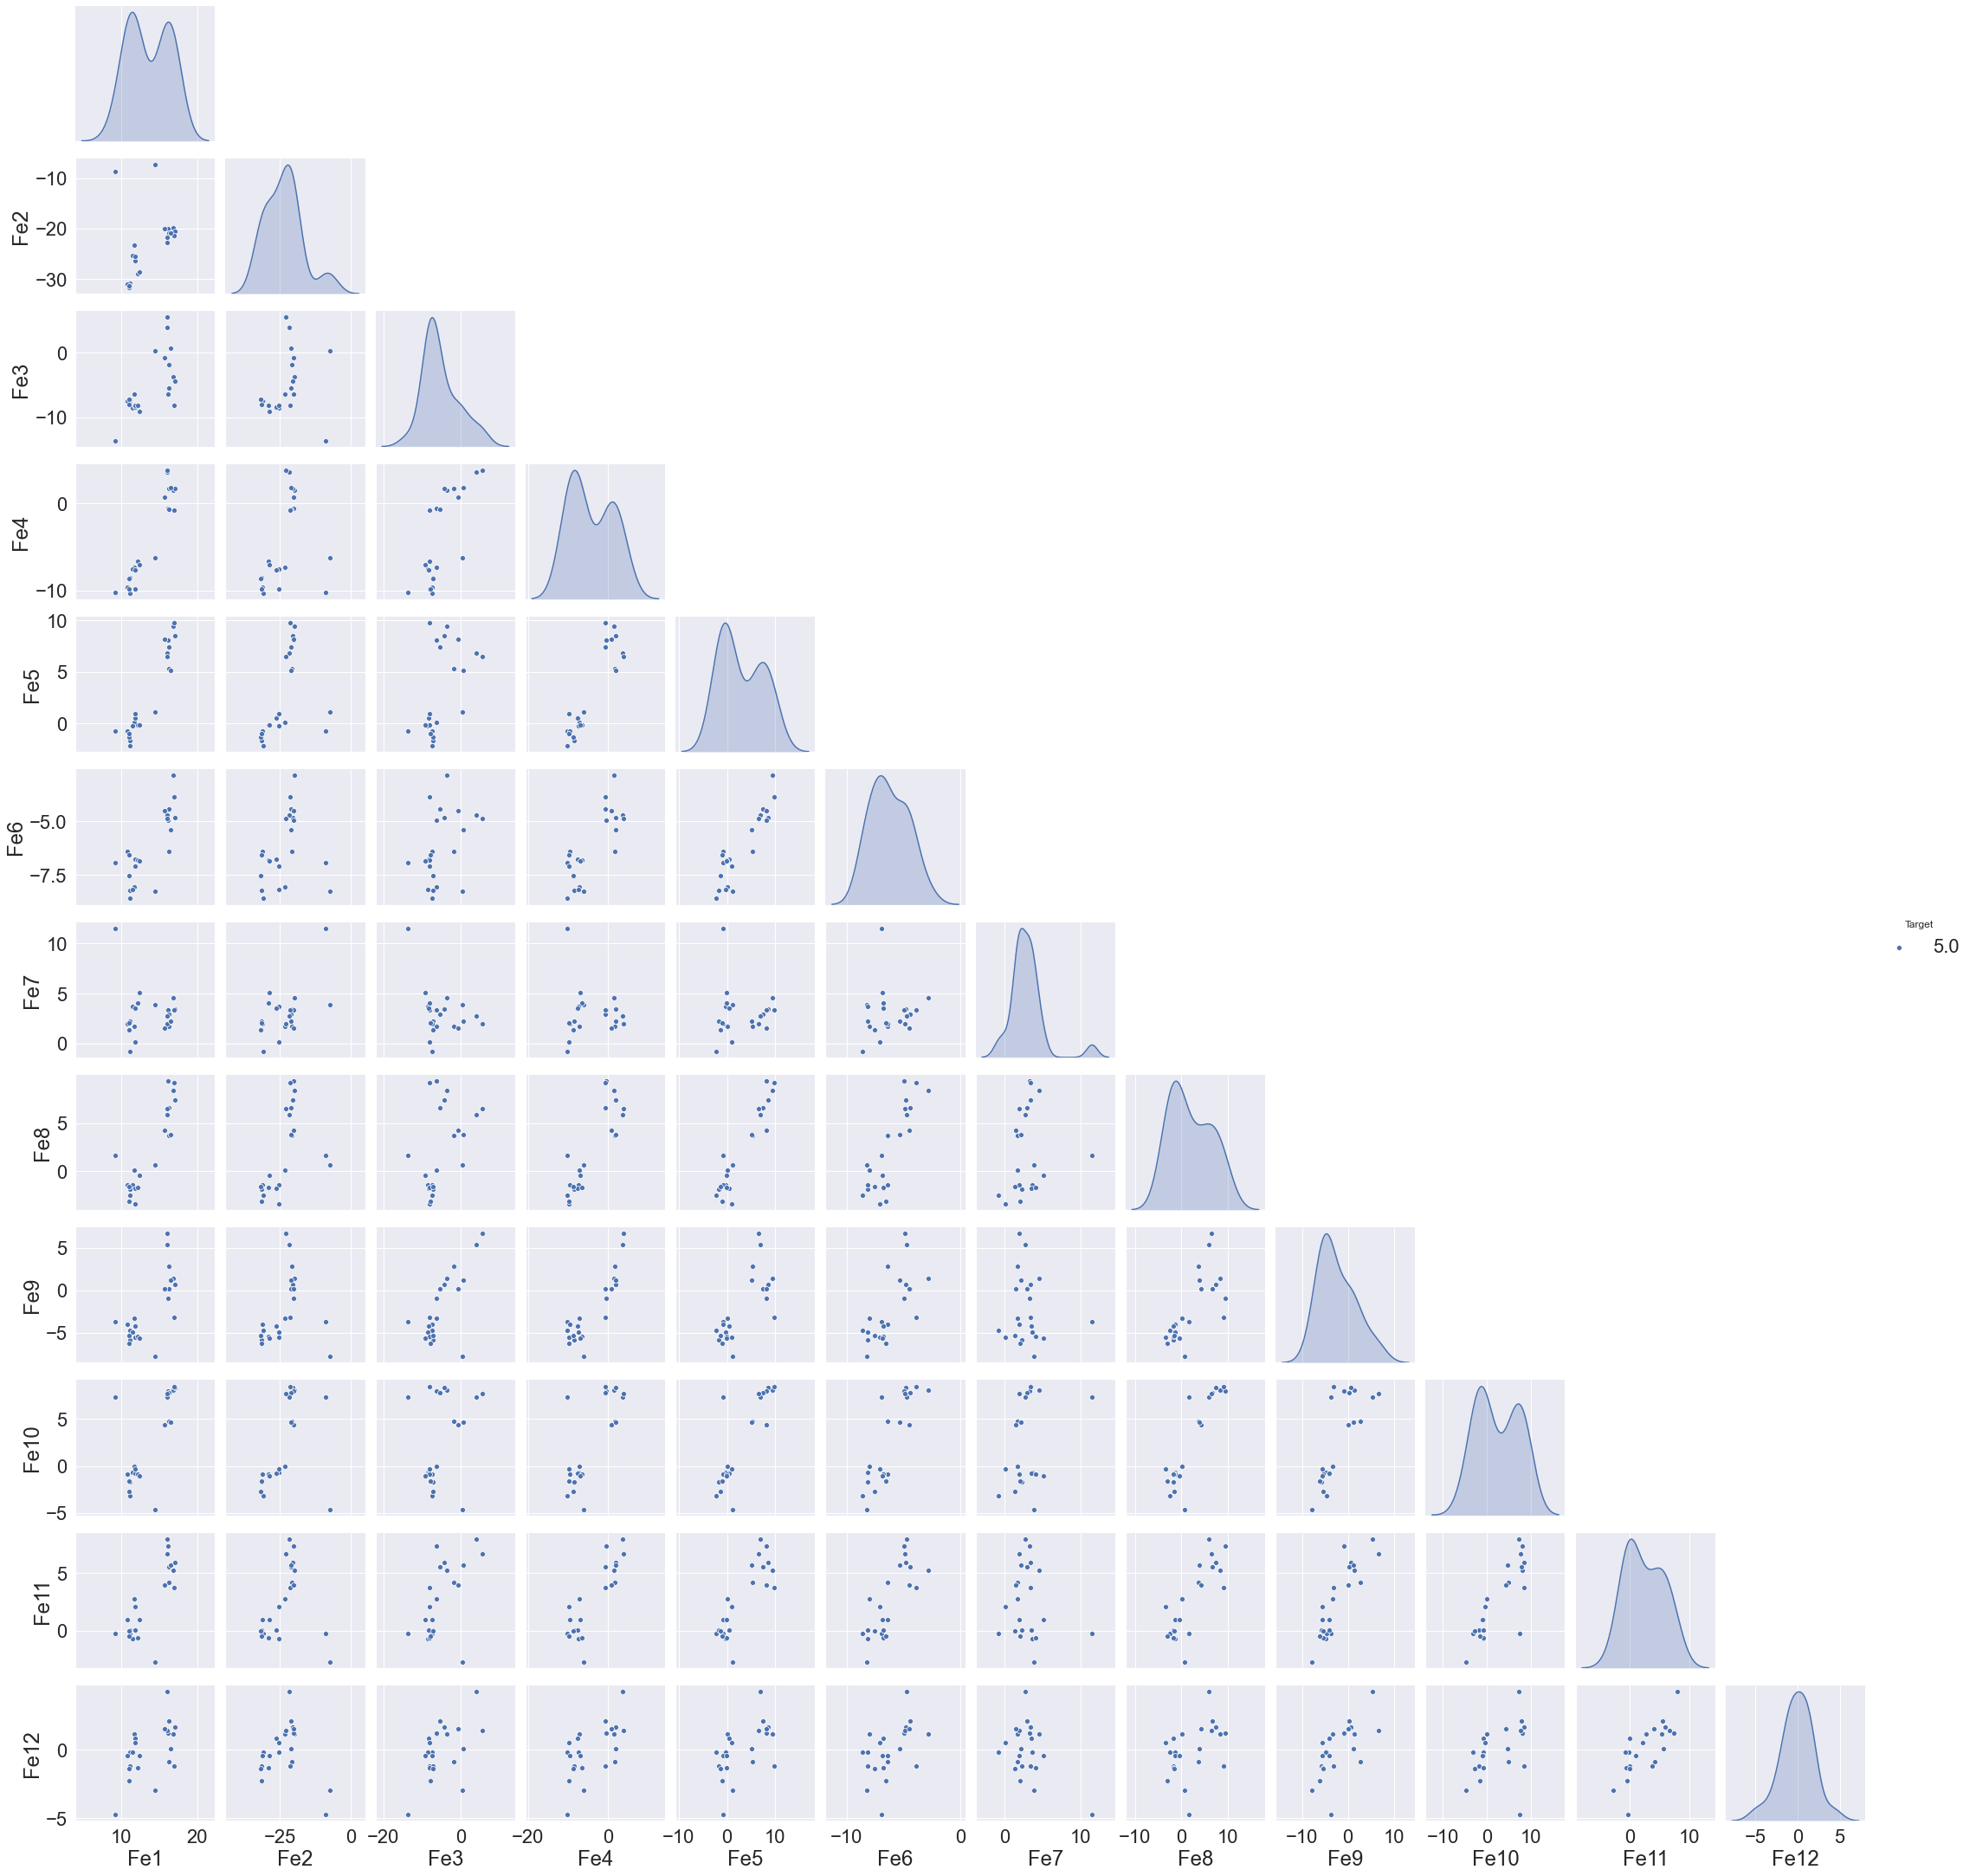

In [97]:
# Selection des paires de features les plus représentatives

for fa, fb in [(1, 3), (3, 4), (5, 8), (11, 5)]:
    data = mydata[mydata['Target'].isin([fa, fb])]
    sns.pairplot(data, hue='Target', corner=True)

L'idée étant de trouver quelles *features* sont les plus représentatives pour distinguer un chiffre d'un autre, la d
émarche est interressante, mais pour 10 chiffres, on ira vers un réseau de neurones :-) 

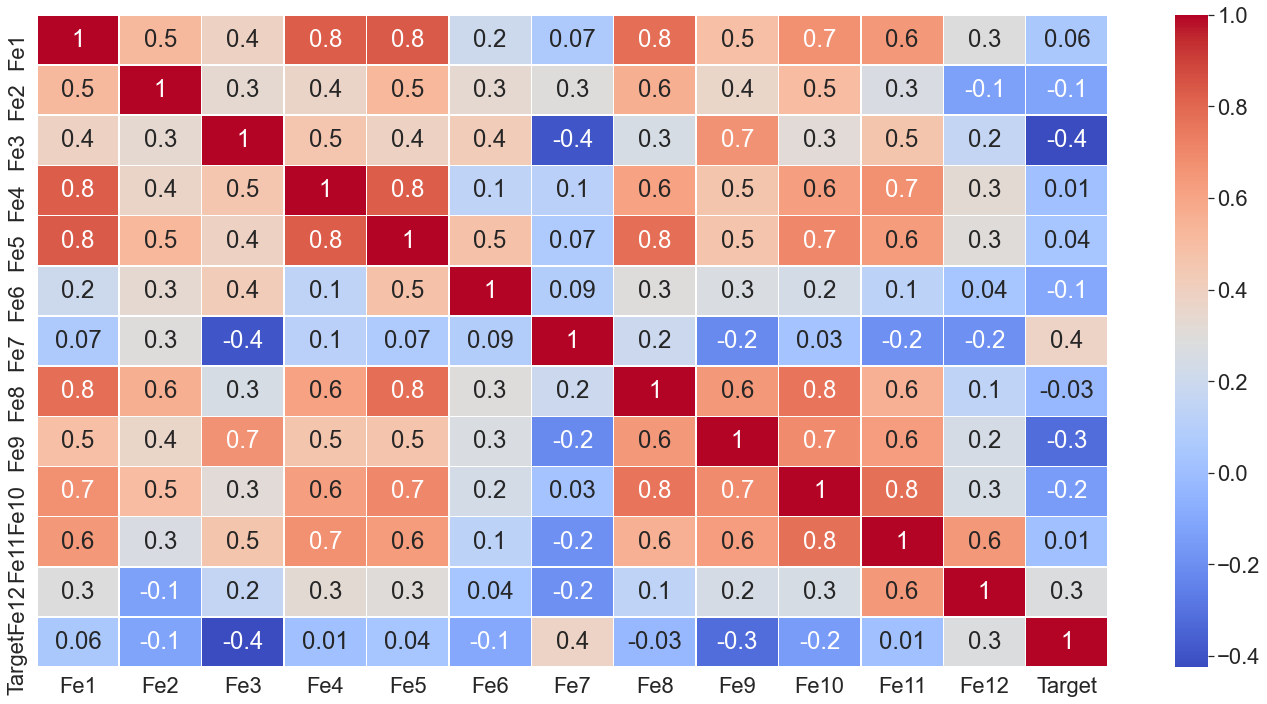

In [98]:
# Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(mydata.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [99]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(230, 12)

In [100]:
y.shape

(230,)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20/100)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(184, 12) (46, 12)
(184,) (46,)


#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X.copy())
x_train_scaled = scaler.transform(x_train)

#And we want to apply this transformation to a new dataset called New_data
x_test_scaled = scaler.transform(x_test)

In [103]:
print(x_train_scaled.mean(), x_train_scaled.std())
print(x_test_scaled.mean(), x_test_scaled.std())

0.0177683128792425 1.0052819568934404
-0.07107325151696958 0.9753555709209267


#### 7. Développer votre meilleur modèle de classification

- [ ] from sklearn.tree import DecisionTreeClassifier
- [ ] from sklearn.ensemble import RandomForestClassifier
- [ ] from sklearn.ensemble import GradientBoostingClassifier
- [~] from sklearn.svm import SVC
- [ ] from sklearn.neural_network import MLPClassifier 

##### DecisionTree

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


dt = DecisionTreeClassifier()

p = Pipeline([
      ('dt', dt),
    ])
params = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [1, 2, 3, 4, 5, 6, 7],
    'dt__min_samples_split': [2, 3, 5, 10, 15, 20]
    }

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

{'dt__criterion': 'entropy', 'dt__max_depth': 7, 'dt__min_samples_split': 5} 0.48360655737704916
0.2391304347826087


In [105]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        min_samples_split=5))])

##### RandomForest

In [106]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#best_n = range(1, 100, 10)
best_n = range(75, 85, 1)
# 91} 0.6411069980609906
# 81} 0.6632293319231447
# 77} 0.6794465009695047
# 84} 0.6958399435924555
print(best_n)

params = {'n_estimators': best_n}
gs = GridSearchCV(rf, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

range(75, 85)
{'n_estimators': 84} 0.674246430460074
0.5652173913043478


In [107]:
from sklearn.pipeline import Pipeline

p = Pipeline([
      ('rf', rf),
    ])
params = {
    'rf__n_estimators': best_n,
    'rf__criterion': ['gini', 'entropy'],
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

{'rf__criterion': 'gini', 'rf__n_estimators': 84} 0.6958399435924555
0.5434782608695652


In [108]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(n_estimators=84))])

##### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

best_n = range(1, 150, 10)
#best_n = range(50, 70, 1)
# 61} 0.5866384628944121
# 57} 0.5867265996827076
# 64} 0.5974792878547506
print(best_n)

# à éviter sans une bonne machine :-()
params = {
    'loss':['deviance'],
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'min_samples_split': np.linspace(0.1, 0.5, 12),
    'min_samples_leaf': np.linspace(0.1, 0.5, 12),
    'max_depth':[3,5,8],
    'max_features':['log2', 'sqrt'],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    'n_estimators': best_n
    }

params = {'n_estimators': best_n}

gs = GridSearchCV(gb, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))



In [ ]:
from sklearn.pipeline import Pipeline

p = Pipeline([
      ('gb', gb),
    ])
params = {
    'gb__n_estimators': best_n,
    'gb__criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

In [ ]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

##### SVM

In [47]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
#best_C = np.logspace(1,9,num=9,base=10,dtype='int')  # range() avec pas logarithmique (de 2^1 à 2^10)
#best_C = range(1, 100, 10)
#best_C = range(1, 10)
best_C = [i/100000 for i in range(18830, 18840)]
# 138 : 0.6518018018018019
# 100 : 0.6518018018018019
#   1 : 0.6783783783783783
#   2 : 0.6840840840840843
# .19 : 0.6837837837837838
#.1883
print(best_C)
grid = GridSearchCV(LinearSVC(), {'C': best_C, 'dual': [False]})
grid.fit(x_train_scaled, y_train)
print("Best score : ", grid.best_score_)
print("Best param : ", grid.best_params_)

[0.1883, 0.18831, 0.18832, 0.18833, 0.18834, 0.18835, 0.18836, 0.18837, 0.18838, 0.18839]
Best score :  0.7231231231231231
Best param :  {'C': 0.1883, 'dual': False}


In [ ]:
from sklearn.pipeline import Pipeline

svm = SVC()
p = Pipeline([
      ('svm', svm),
    ])
params = {
    'svm__C': best_C,
    'svm__dual': [False],
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

In [ ]:
# Meilleur Modèle :
model = grid.best_estimator_
model.fit(x_train_scaled, y_train)

##### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

mlp = MLPClassifier()

p = Pipeline([
      ('mlp', mlp),
    ])
params = {
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__max_iter': range(1, 1000, 100),
    'mlp__alpha': 10.0 ** -np.arange(1, 10),
    'mlp__hidden_layer_sizes':np.arange(10, 15),
    'mlp__random_state':[0,1,2,3,4,5,6,7,8,9],
    'mpl__n_jobs': [-1]
}

gs = GridSearchCV(p, params, cv=3).fit(x_train, y_train)
print(gs.best_params_, gs.best_score_)
print(gs.score(x_test, y_test))

In [ ]:
# Meilleur Modèle :
model = gs.best_estimator_
model.fit(x_train_scaled, y_train)

##### Tensorflow

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrainement du modèle
history = model.fit(x_train_scaled,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: 2.3367 - accuracy: 0.0924
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 2.2341 - accuracy: 0.1902
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 2.1594 - accuracy: 0.3043
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 2.0952 - accuracy: 0.4022
Epoch 5/20
2/2 [==============================] - 0s 9ms/step - loss: 2.0337 - accuracy: 0.4620
Epoch 6/20
2/2 [==============================] - 0s 8ms/step - loss: 1.9700 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 1.9034 - accuracy: 0.5652
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 1.8348 - accuracy: 0.5598
Epoch 9/20
2/2 [==============================] - 0s 11ms/step - loss: 1.7631 - accuracy: 0.5652
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 1.6914 - accuracy: 0.5978
Epoch 11/20
2/2 [=====================

In [17]:
# évaluation du modèle
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print('test_acc: ',test_acc)

# Predictions
predictions = model.predict(x_test_scaled)
print("Meilleure predictions pour : ", np.argmax(predictions[0]))

2/2 [==============================] - 0s 4ms/step - loss: 1.0859 - accuracy: 0.7391
test_acc:  0.739130437374115
Meilleure predictions pour :  5


In [ ]:
# Meilleur Modèle :
model = model
model.fit(x_train_scaled, y_train)

##### XGBoost

In [18]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(x_train)
dtest = xgb.DMatrix(x_test)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

XGBoostError: [10:48:59] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:58: Check failed: preds.Size() == info.labels_.Size() (184 vs. 0) :  labels are not correctly providedpreds.size=184, label.size=0, Loss: binary:logistic

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Optimiser la structure des données
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

# k-fold Cross Validation
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print(cv_results.head())

print("Meilleur : ", (cv_results["test-rmse-mean"]).tail(1))

RMSE: 3.333948
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         4.464022        0.153343        4.477368       0.342120
1         4.175620        0.131367        4.208744       0.348357
2         3.925003        0.109542        3.984094       0.351474
3         3.694844        0.108485        3.776299       0.342280
4         3.486778        0.110514        3.611895       0.327722
Meilleur :  49    2.275472
Name: test-rmse-mean, dtype: float64


In [ ]:
# Meilleur Modèle :
model = xg_reg
#model = cv_results.best_estimator_
model.fit(x_train_scaled, y_train)

In [ ]:
# save in JSON format
model.save_model("model_XGBoot.json")

# Application en Temps Réel

Voir le notebook `Recorder` !

In [37]:
# Pour le dev de rec et rec2
from importlib import reload  # Python 3.4+

import Tools.tools
reload(Tools.tools)

<module 'Tools.tools' from 'C:\\Users\\utilisateur\\Documents\\Projets\\AudioDigitsRecognition\\Digits_Recognition_Project\\Tools\\tools.py'>

In [38]:
from Tools.tools import rec

In [39]:
pred = rec(scaler, model)

Attention, l'enregistrement commence dans :
3
2
1
Prononcer votre Digit : 
------------------
Digit (prédiction) :  0.0
------------------


In [47]:
# Pour Tensorflow :

print("Prediction : ", np.argmax(pred[0]))
for p in pred[0]:
    print(p)

Prediction :  5
0.006192827
0.2732236
0.0027753888
0.08298996
0.016517254
0.4003243
0.021036427
0.002597982
0.0046727904
0.18966942


## Enregistrement du modèle

In [40]:
# Avec pickle
from pickle import dump
# save the model to disk
filename = 'best_model.pkl'
dump(model, open(filename, 'wb'))

In [41]:
# Avec joblib
from joblib import dump 
# save the model to disk
filename = 'best.sav'
dump(model, filename)

['best.sav']